#### I recommend reading about conditional probability and the example below then come back to these rules if you find a problem :)

# Main Probability Rules for Reference

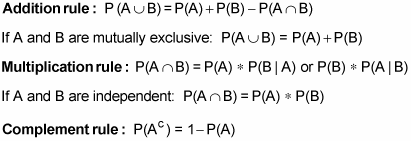

# Bayes Rule

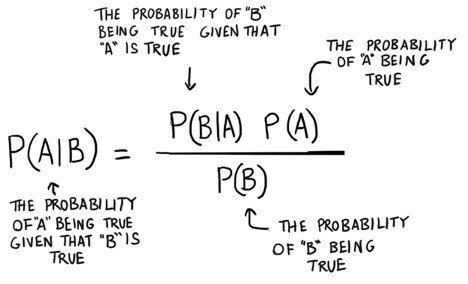

### if P(B) isn't given we find it using: 

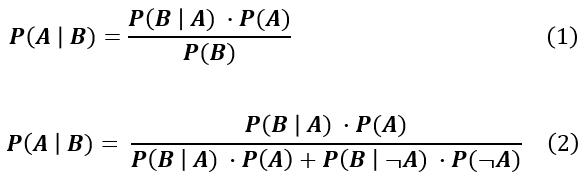

## Conditional Probability

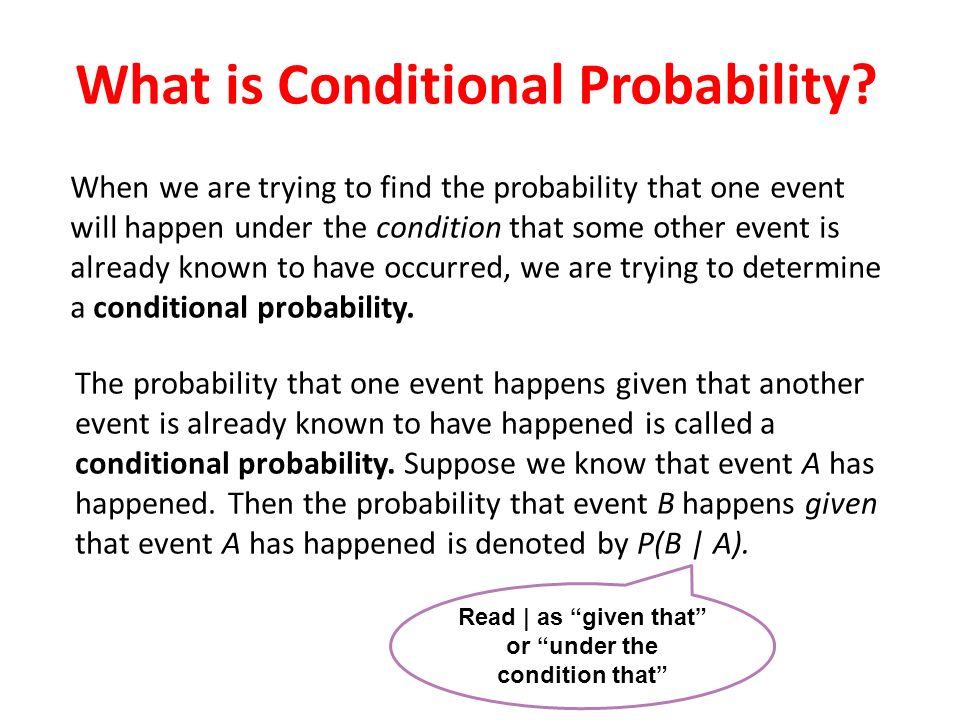

### Short animated video explanation for conditional probability: https://www.youtube.com/watch?v=by3_weGwnMg

## A simple example to explain the intuition behind Bayes rule:
##### ***This example's credit goes to university of Zurich - Coursera An intuitive intro to probability course.
##### A link to the course if you'd like to check it out: https://www.coursera.org/learn/introductiontoprobability

### A shop has 3 suppliers named S, T, U. Of the goods supplied to the shop 90% are in good condition and 10% are in a bad condition.
### The percentage of good supplies from each supplier are as follows:
### S = 60% , T = 25%, U = 15% . ---- P(supplier | good)
### The percentage of bad supplies from each supplier are as follows:
### S = 40%, T = 30%, U = 30%. ---- P(supplier | bad)

### Typing out the probabilities above:
#### P(good) = 0.9, P(bad) = 0.1
#### P(S | good) = 0.6, P(T | good) = 0.25, P(U | good) = 0.15
#### P(S | bad) = 0.4, P(T | bad) = 0.3, P(U | bad) = 0.3

### The shop owner wants to know which supplier delivers the highest proportion of good supplies. aka his best supplier and he also wants to know his worst supplier.

### To find this I need to find the probability of P(good | supplier) and P(bad | supplier). To find this I'll have to use Bayes rule, as I need to flip the probability from P(B | A) to p(A | B) and to do that according to Bayes rule I need to find the intersection P( A ∩ B ). For ease probability tables are used. **review probability rules above.

### By constructing the information above into a probability table:
### The highlighted squares represents the probability of the intersection P( A ∩ B ) = P(B | A) * P(A) given that both A and B are independent events (we assume independence all throughout the example).





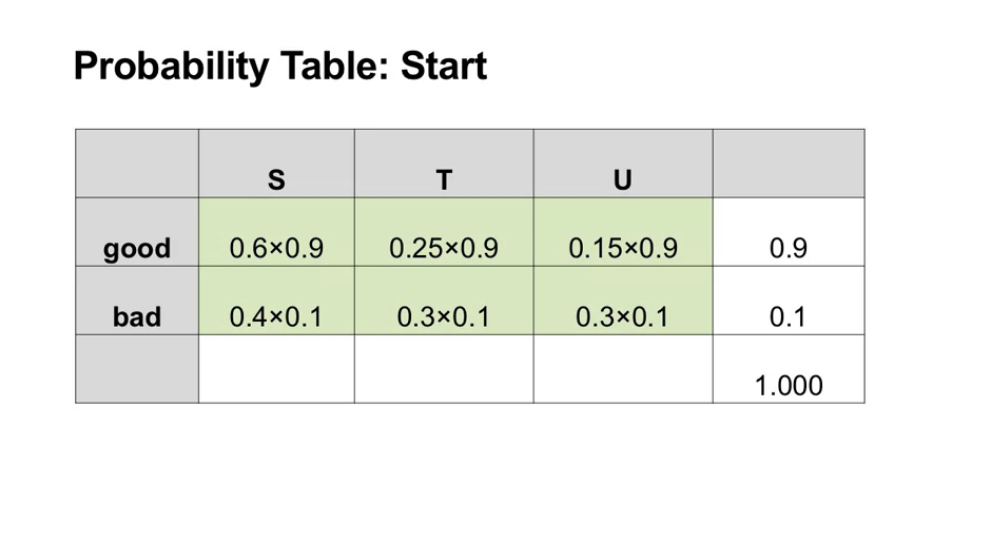

### The last row represents the addition of P ( supplier ∩ good ) + P ( supplier ∩ bad )

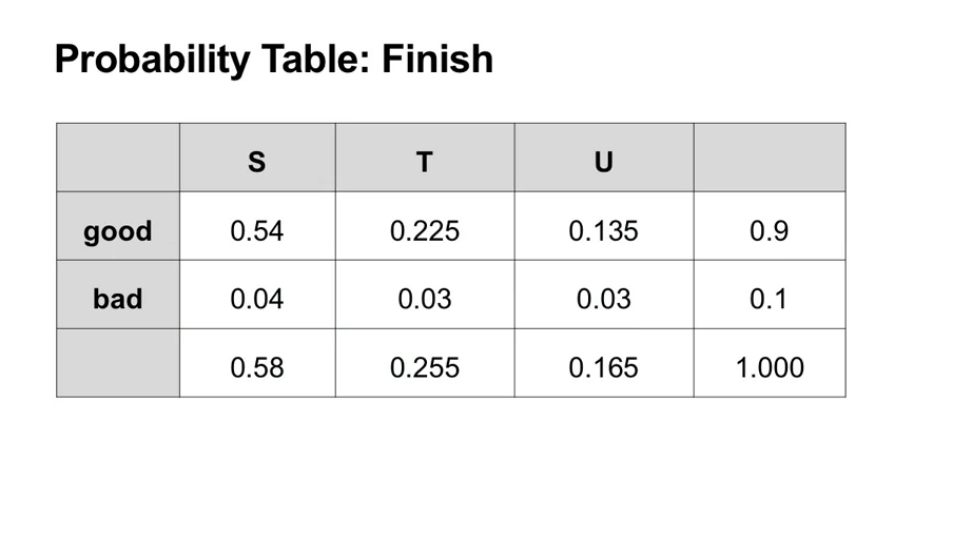

### Q: Using Bayes rule we get the following. Which is the best and worst supplier? 

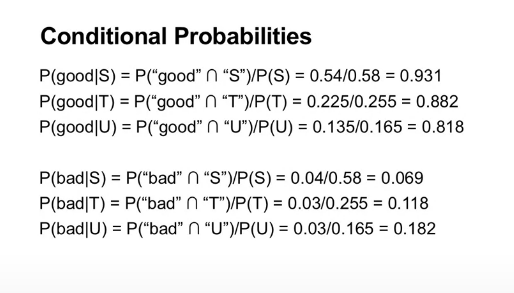

# Naive Bayes

## 1. What is Naive Bayes? 
### A supervised machine learning algorithms based on Bayes rule.

## 2. Why Naive?
### It's called naive because it "naively" assumes conditional independence between every pair of features.

## 3. What is it used for?
### It's famously used for document classification and spam filtering.
## 4. Types of Naive Bayes algorithm?
### Gaussian, multinomial, complement, bernoulli and categorical.

#### For more info. check out this documentation: https://scikit-learn.org/stable/modules/naive_bayes.html
#### Detailed video explanation for Naive Bayes: https://www.youtube.com/watch?v=O2L2Uv9pdDA

# Full Implementation of Naive Bayes

### In this example the easiest and most used naive bayes algorithm is used "Gaussian Naive Bayes".
#### Video explanation for Gaussian Naive Bayes: https://www.youtube.com/watch?v=H3EjCKtlVog&vl=en
### This code is taken from this website check it for better explanation, I wrote the code down so you can play with it: https://towardsdatascience.com/implementing-naive-bayes-in-2-minutes-with-python-3ecd788803fe 

In [104]:
#loading the famous iris dataset
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris_data = load_iris()

#small and capital letters are used to differentiate between a matrix(capital) and a vector(small).
X = iris_data.data
y = iris_data.target 
column_names = iris_data.feature_names

In [105]:
#lets take a look at the data

#Names of features/columns in the iris dataset
print("column names :", iris_data.feature_names)

#The target/output in the iris dataset (names of iris flowers)
print("types of iris :", iris_data.target_names)

column names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
types of iris : ['setosa' 'versicolor' 'virginica']


In [106]:
# size of feature matrix
print(iris_data.data.shape)

(150, 4)


In [107]:
#To visulize the data easier I'll convert it into pandas data frame, want to learn more about pandas? let me know!
X = pd.DataFrame(X, columns = column_names)

In [108]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [109]:
#Splitting the data into training and test data using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22) 

In [110]:
#Calculating the mean and standard deviation for the training set.
mean = X_train.groupby(y_train).apply(np.mean) #the groupby function is used to group each column and find its mean.
std = X_train.groupby(y_train).apply(np.std)

#now the class probabilities are calculated by counting the # of instances(rows) in each class and dividing it by total # of instances
prob = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]

In [111]:
#Calculate the probability using bayes rule for the test set
from scipy.stats import norm

y_pred = []
# for each element in the test set
for i in range(X_test.shape[0]):
    p = {}
    #for each unique class
    for c in np.unique(y_train):
        #take the prior probability
        p[c]=prob.iloc[c]
        
        #for each column in the data
        for index, parameter in enumerate(X_test.iloc[i]):
            
        #Multiply by the probability of the given column value to belong to the distribution of the train column
        #for the given class
            p[c] *= norm.pdf(parameter, mean.iloc[c, index], std.iloc[c, index])
    y_pred.append(pd.Series(p).values.argmax())

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

# Implementing Naive Bayes Using Sklearn

In [115]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=22)

model = GaussianNB()

y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

accuracy_score(y_test, y_pred)

Number of mislabeled points out of a total 38 points : 1


0.9736842105263158

# vs Decision Tree Classifier

### ID3 Algorithm

In [15]:
from sklearn.tree import DecisionTreeClassifier

X, y = datasets.load_iris(return_X_y=True)

X_train = X[range(0,150,2),:]
y_train = y[range(0,150,2)]

X_test = X[range(1,150,2),:]
y_test = y[range(1,150,2)]

classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

print("Acuracy =", metrics.accuracy_score(y_test, prediction, normalize=True))

Acuracy = 0.96
